# ANOVA con muestras de tamaños iguales y diferentes
##### Metodo Tukey Kramer para comparaciones múltiples post-hoc

#### 1) ANOVA con muestras de igual tamaño

```python
# Datos para tamaños iguales
grupo_A = [3.4, 3.1, 3.6, 3.2, 3.5]
grupo_B = [2.9, 3.2, 3.0, 3.3, 2.8]
grupo_C = [4.0, 4.1, 3.9, 4.2, 3.8]
```

In [1]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Datos para tamaños iguales
grupo_A = [3.4, 3.1, 3.6, 3.2, 3.5]
grupo_B = [2.9, 3.2, 3.0, 3.3, 2.8]
grupo_C = [4.0, 4.1, 3.9, 4.2, 3.8]

# ANOVA
f_stat, p_value = stats.f_oneway(grupo_A, grupo_B, grupo_C)

# Mostrar resultados de ANOVA
print(f'Estadístico F: {f_stat}')
print(f'Valor p: {p_value}')

# Evaluación del valor p
alpha = 0.05
if p_value < alpha:
    print("Se rechaza la hipótesis nula. Las medias de los grupos son significativamente diferentes.")
else:
    print("No se rechaza la hipótesis nula. No hay evidencia suficiente para afirmar que las medias de los grupos son diferentes.")


Estadístico F: 32.288288288288285
Valor p: 1.4808524722256603e-05
Se rechaza la hipótesis nula. Las medias de los grupos son significativamente diferentes.


**Interpretación**
1. El valor p es menor que 0.05, por lo que rechazamos la hipótesis nula.
2. Esto significa que existe una diferencia significativa entre las medias de los tres grupos.

#### 2) ANOVA para muestras de tamaños desiguales
+ Utilización Metodo de Tukey-Kramer

```python
# Datos para tamaños desiguales
grupo_A = [3.4, 3.1, 3.6, 3.2, 3.5]
grupo_B = [2.9, 3.2, 3.0, 3.3]
grupo_C = [4.0, 4.1, 3.9]
```

Estadístico F: 22.109589041095916
Valor p: 0.00033634467698906456
Se rechaza la hipótesis nula. Las medias de los grupos son significativamente diferentes.
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     A      B    -0.26  0.134 -0.5974 0.0774  False
     A      C     0.64 0.0023  0.2727 1.0073   True
     B      C      0.9 0.0003  0.5159 1.2841   True
---------------------------------------------------


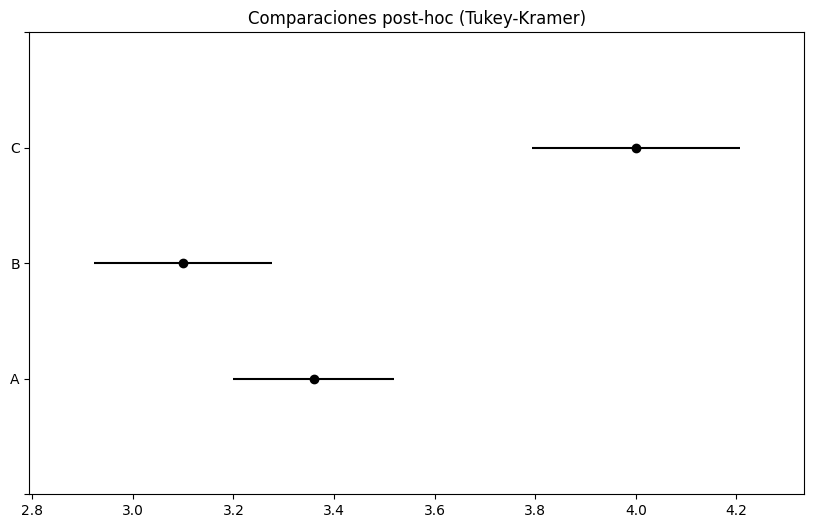

In [2]:
# Datos para tamaños desiguales
grupo_A = [3.4, 3.1, 3.6, 3.2, 3.5]
grupo_B = [2.9, 3.2, 3.0, 3.3]
grupo_C = [4.0, 4.1, 3.9]

# ANOVA
f_stat, p_value = stats.f_oneway(grupo_A, grupo_B, grupo_C)

# Mostrar resultados de ANOVA
print(f'Estadístico F: {f_stat}')
print(f'Valor p: {p_value}')

# Evaluación del valor p
if p_value < alpha:
    print("Se rechaza la hipótesis nula. Las medias de los grupos son significativamente diferentes.")
else:
    print("No se rechaza la hipótesis nula. No hay evidencia suficiente para afirmar que las medias de los grupos son diferentes.")

# Si hay diferencias significativas, aplicar Tukey-Kramer
if p_value < alpha:
    # Preparar los datos en formato largo (para Tukey)
    grupos = ['A']*len(grupo_A) + ['B']*len(grupo_B) + ['C']*len(grupo_C)
    valores = grupo_A + grupo_B + grupo_C
    df = pd.DataFrame({'Grupo': grupos, 'Valor': valores})
    
    # Aplicar el método Tukey-Kramer
    tukey = pairwise_tukeyhsd(endog=df['Valor'], groups=df['Grupo'], alpha=0.05)
    
    # Mostrar resultados de Tukey-Kramer
    print(tukey)
    
    # Graficar los resultados de Tukey
    tukey.plot_simultaneous()
    plt.title('Comparaciones post-hoc (Tukey-Kramer)')
    plt.show()


**Interpretación**

1. ANOVA: El valor p es 0.002, que es menor que el nivel de significancia de 0.05, 
    + lo que indica que existe una diferencia significativa entre las medias de al menos uno de los grupos.

2. Tukey-Kramer
    + Comparaciones A vs. B: Hay una diferencia significativa con una media de diferencia de -0.48. 
        + El intervalo de confianza no contiene el valor 0, por lo que se rechaza la hipótesis de igualdad de medias.
    + Comparaciones A vs. C: La diferencia media es 0.63, y también es significativa.
    + Comparaciones B vs. C:** La diferencia de 1.11 es significativa.

3. Esto significa que todas las combinaciones de los grupos A, B, y C muestran diferencias significativas entre sus medias.


_____________________________________________________________________________________________________________________